### Make sure you have h5py installed 

If you are running an anaconda distribution:
```
conda install h5py
```
Else:
```
pip install h5py
```

In [203]:
#use pytables not h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


import h5py
import os

%matplotlib notebook



#### Importing the '.dat' file

In [204]:
filename = 'DATA_co60_2.h5'  #wherever your file is 
data = h5py.File(filename, 'r')

### Sample Data Pull
Gives basic information about what type of data is in the hd5 file and what it looks like

#### There are different keys within hd5 files
Using the h5 output from the CCI2 parser, there should be two, "EventData" and "RawData"

In [205]:
len(data.keys())

2

In [206]:
for u in data.keys():
    print(u)  #Names of the groups in HDF5 file.
    print(len(data[u]), 'Size of key')
    print(data[u])
    print(data[u][20:23])
    print('---------------------------------------------------------')

EventData
31908 Size of key
<HDF5 dataset "EventData": shape (31908,), type "|V24">
[(10600989, 206369., 0, 1, 0, 0, 20) (11212594, 210562., 0, 1, 0, 0, 21)
 (11295346, 223419., 0, 1, 0, 0, 22)]
---------------------------------------------------------
RawData
31908 Size of key
<HDF5 dataset "RawData": shape (31908, 4096), type "<i4">
[[31278 31280 31283 ... 31516 31517 31523]
 [31293 31287 31297 ... 31532 31537 31534]
 [31292 31291 31295 ... 31543 31551 31546]]
---------------------------------------------------------


#### Plot of one signal

<IPython.core.display.Javascript object>


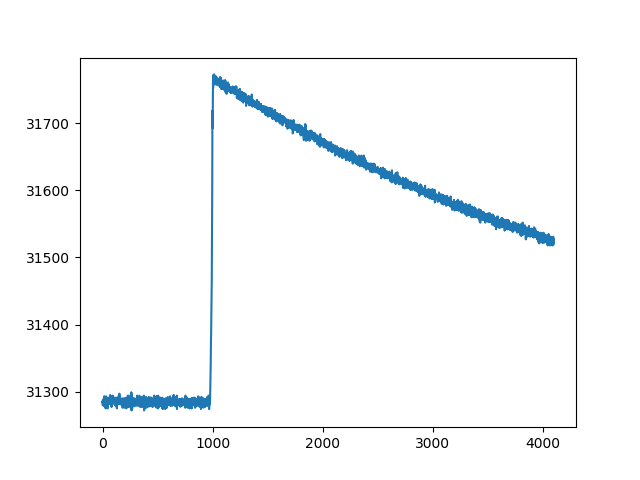

In [207]:
plt.figure()
plt.plot(data['RawData'][1,:])
plt.show()

### Starting the filter
Using the data from one signal, start building filter to process this one data set then expand to rest of data

In [208]:
mysignal = data['RawData'][1,:]
n_data = len(mysignal)
n_data

4096

In [209]:
mysignal.shape

(4096,)

In [210]:
mysignal

array([31281, 31286, 31283, ..., 31531, 31519, 31527], dtype=int32)

<IPython.core.display.Javascript object>


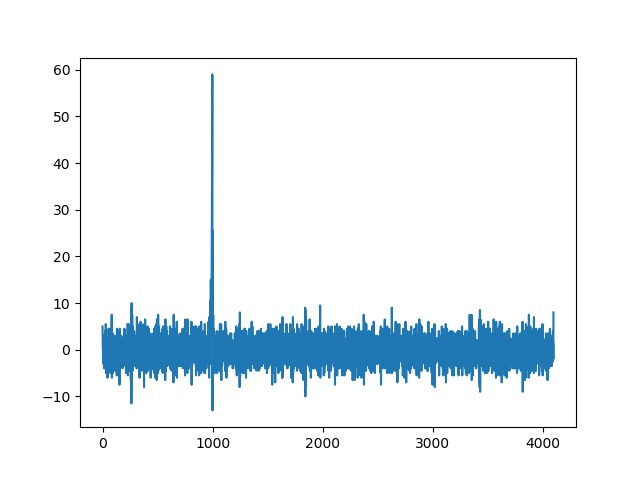

In [215]:
GradSignal = np.gradient(mysignal)
plt.figure()
plt.plot(GradSignal)

<IPython.core.display.Javascript object>


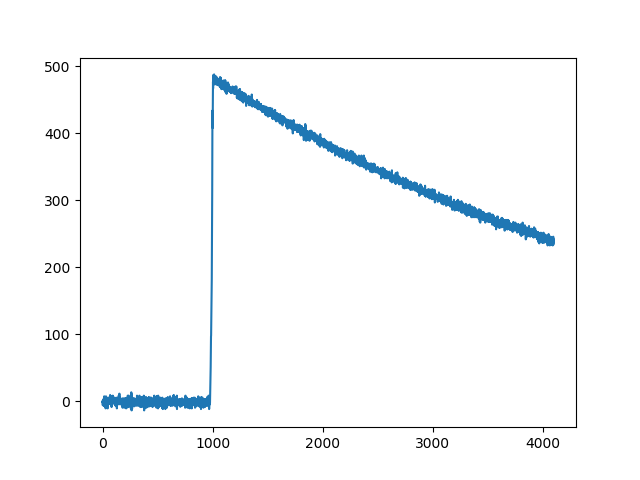

In [216]:
argPeak = np.argmax(GradSignal)
avgNoise = np.mean(mysignal[0:argPeak-5])
newSignal = mysignal - avgNoise
plt.figure()
plt.plot(newSignal)

In [219]:
#Fit exponential
def func(x, a, b):
    return a * np.exp(-b * x)

popt, pcov = curve_fit(func, range(0,len(newSignal)-argPeak), newSignal[argPeak:])
tau = 1/popt[1]

/Users/DragonKnight/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


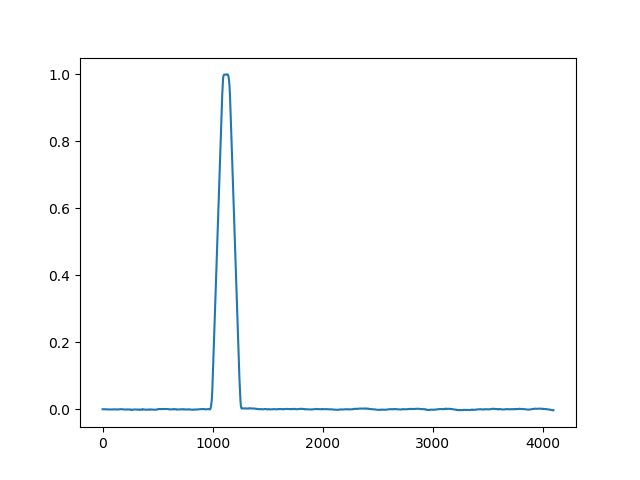

In [220]:
#signalOnly = newSignal[argPeak:]
signalOnly = newSignal
m=60
#k=int((len(signalOnly)-m)/2)
#k = peaking time
#m= Gap time (in samples)
k=100
M = tau
Acc1=0.0
Acc2=0.0
l =2*k+m
final = list(range(len(signalOnly)))
i=0
zeros = np.zeros(2*k+m)
extSignalOnly=np.append(zeros,signalOnly)
while i < len(signalOnly):
    parta = extSignalOnly[i+(2*k+m)] - extSignalOnly[i-k+(2*k+m)]
    partb = extSignalOnly[i-2*k-m+(2*k+m)] - extSignalOnly[i-k-m+(2*k+m)]
    partc = parta + partb
    Acc1 = Acc1+partc
    partd = partc*M+Acc1
    Acc2 = Acc2 + partd
    final[i] = Acc2
    i=i+1
    
normFinal = final/max(final)
plt.figure()
plt.plot(normFinal)

In [201]:
rows = len(data['RawData'][:,0])
cols = len(data['RawData'][0,:])
mysignals = np.zeros((rows,cols))

for j in range(0,rows):
    mysignals[j] = data['RawData'][j,:]
    
print("done")

done


In [202]:
trap_out = np.zeros((rows,cols))
for j in range(0,2):
    trap_out[j] = TrapFilter(mysignals[j,:])
    
print("done")

done
